In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [3]:
df = pd.read_csv("D:/python_eda/Bank_customer_info.csv")
df

,Customer_ID,Customer_Age,Cust_Salary,Account_Balance,Marital_Status,Job_Type,Education,targeted,Loan_Defaulter,Housing_Loan,Prsonal_Loan,Contact_By,Day_Contacted,Month_Contacted,Call_Duration (Sec),Campaign_Reach,Passed_Day_Contacted,No_of_Times_Contacted,Contact_Outcome,Term_Deposit_Account
0,1,58.0,100000,2143,married,management,tertiary,yes,no,yes,no,unknown,5,"may, 2017",261,1,-1,0,unknown,no
1,2,44.0,60000,29,single,technician,secondary,yes,no,yes,no,unknown,5,"may, 2017",151,1,-1,0,unknown,no
2,3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,yes,unknown,5,"may, 2017",76,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,no,unknown,5,"may, 2017",92,1,-1,0,unknown,no
4,5,33.0,0,1,single,unknown,unknown,no,no,no,no,unknown,5,"may, 2017",198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,technician,tertiary,yes,no,no,no,cellular,17,"nov, 2017",977,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,retired,primary,yes,no,no,no,cellular,17,"nov, 2017",456,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,retired,secondary,yes,no,no,no,cellular,17,"nov, 2017",1127,5,184,3,success,yes
45209,45210,57.0,20000,668,married,blue-collar,secondary,yes,no,no,no,telephone,17,"nov, 2017",508,4,-1,0,unknown,no


In [51]:
df.head()

,Customer_ID,Customer_Age,Cust_Salary,Account_Balance,Marital_Status,Job_Type,Education,targeted,Loan_Defaulter,Housing_Loan,Prsonal_Loan,Contact_By,Day_Contacted,Month_Contacted,Call_Duration (Sec),Campaign_Reach,Passed_Day_Contacted,No_of_Times_Contacted,Contact_Outcome,Term_Deposit_Account
0,1,58.0,100000,2143,married,management,tertiary,yes,no,yes,no,unknown,5,"may, 2017",261,1,-1,0,unknown,no
1,2,44.0,60000,29,single,technician,secondary,yes,no,yes,no,unknown,5,"may, 2017",151,1,-1,0,unknown,no
2,3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,yes,unknown,5,"may, 2017",76,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,no,unknown,5,"may, 2017",92,1,-1,0,unknown,no
4,5,33.0,0,1,single,unknown,unknown,no,no,no,no,unknown,5,"may, 2017",198,1,-1,0,unknown,no


In [52]:
df['Date'] = df['Day_Contacted'].astype(str) + '-' + df['Month_Contacted']

# dropping original "day" and "month" columns
df.drop(columns = ['Day_Contacted','Month_Contacted'], inplace = True)

df.head()

,Customer_ID,Customer_Age,Cust_Salary,Account_Balance,Marital_Status,Job_Type,Education,targeted,Loan_Defaulter,Housing_Loan,Prsonal_Loan,Contact_By,Call_Duration (Sec),Campaign_Reach,Passed_Day_Contacted,No_of_Times_Contacted,Contact_Outcome,Term_Deposit_Account,Date
0,1,58.0,100000,2143,married,management,tertiary,yes,no,yes,no,unknown,261,1,-1,0,unknown,no,"5-may, 2017"
1,2,44.0,60000,29,single,technician,secondary,yes,no,yes,no,unknown,151,1,-1,0,unknown,no,"5-may, 2017"
2,3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,yes,unknown,76,1,-1,0,unknown,no,"5-may, 2017"
3,4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,no,unknown,92,1,-1,0,unknown,no,"5-may, 2017"
4,5,33.0,0,1,single,unknown,unknown,no,no,no,no,unknown,198,1,-1,0,unknown,no,"5-may, 2017"


In [55]:
df.dtypes

Customer_ID                       int64
Customer_Age                    float64
Cust_Salary                       int64
Account_Balance                   int64
Marital_Status                   object
Job_Type                         object
Education                        object
targeted                         object
Loan_Defaulter                   object
Housing_Loan                     object
Prsonal_Loan                     object
Contact_By                       object
Call_Duration (Sec)               int64
Campaign_Reach                    int64
Passed_Day_Contacted              int64
No_of_Times_Contacted             int64
Contact_Outcome                  object
Term_Deposit_Account             object
Date                     datetime64[ns]
dtype: object

In [54]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b, %Y')

In [4]:
df.shape

(45211, 20)

In [5]:
df.info

<bound method DataFrame.info of        Customer_ID  Customer_Age  Cust_Salary  Account_Balance Marital_Status  \
0                1          58.0       100000             2143        married   
1                2          44.0        60000               29         single   
2                3          33.0       120000                2        married   
3                4          47.0        20000             1506        married   
4                5          33.0            0                1         single   
...            ...           ...          ...              ...            ...   
45206        45207          51.0        60000              825        married   
45207        45208          71.0        55000             1729       divorced   
45208        45209          72.0        55000             5715        married   
45209        45210          57.0        20000              668        married   
45210        45211          37.0       120000             2971        married

First few rows of the dataset:
   Customer_ID  Customer_Age  Cust_Salary  Account_Balance Marital_Status  \
0            1          58.0       100000             2143        married   
1            2          44.0        60000               29         single   
2            3          33.0       120000                2        married   
3            4          47.0        20000             1506        married   
4            5          33.0            0                1         single   

       Job_Type  Education targeted Loan_Defaulter Housing_Loan Prsonal_Loan  \
0    management   tertiary      yes             no          yes           no   
1    technician  secondary      yes             no          yes           no   
2  entrepreneur  secondary      yes             no          yes          yes   
3   blue-collar    unknown       no             no          yes           no   
4       unknown    unknown       no             no           no           no   

  Contact_By  Day_Contact

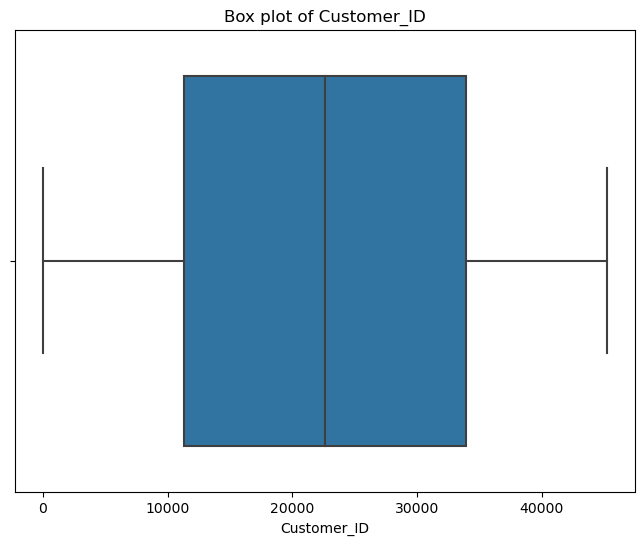

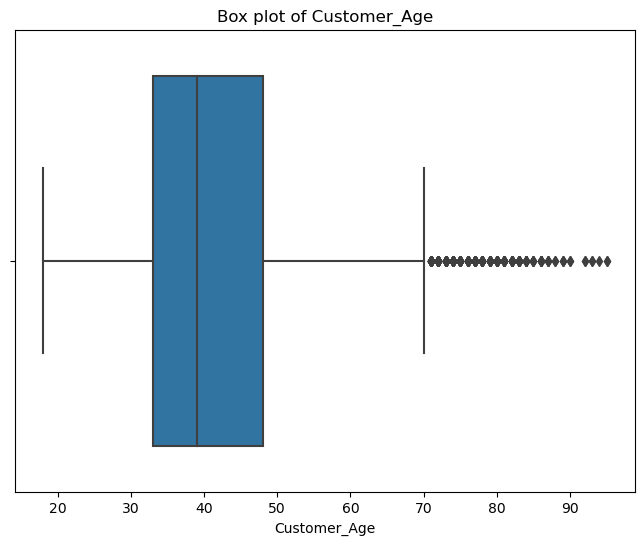

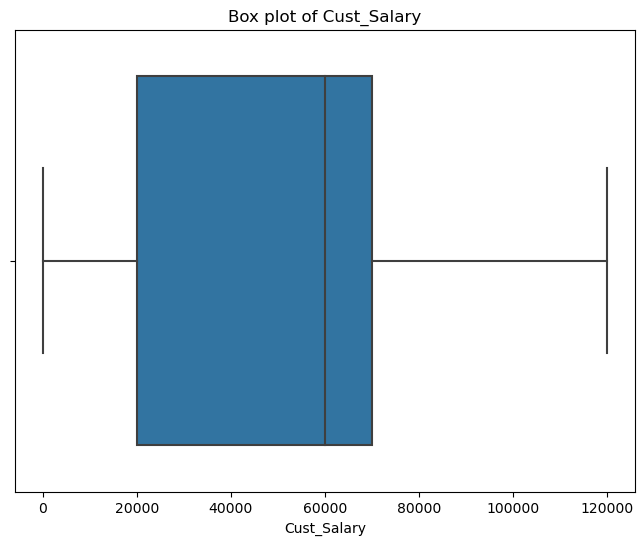

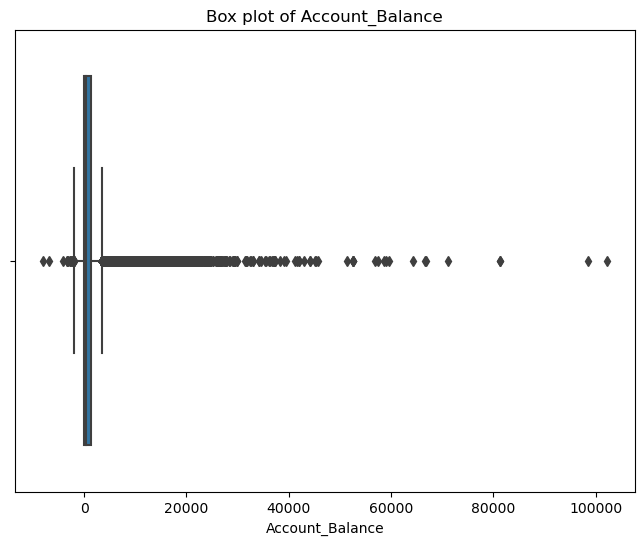

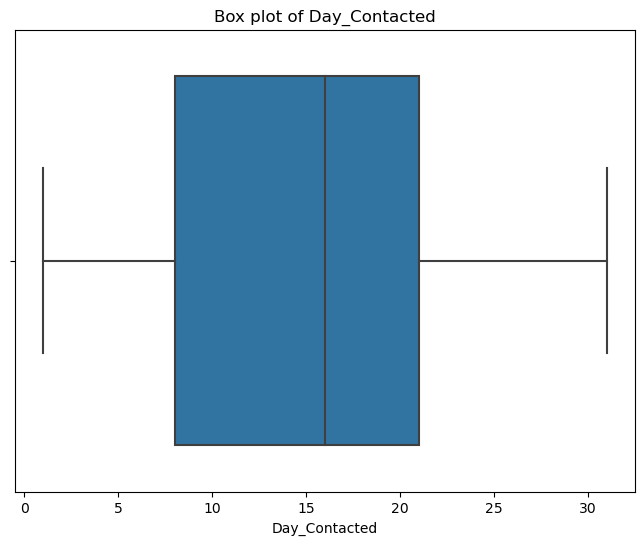

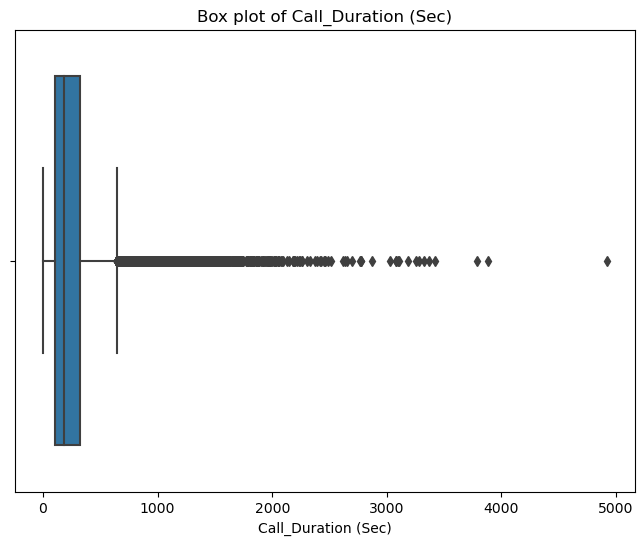

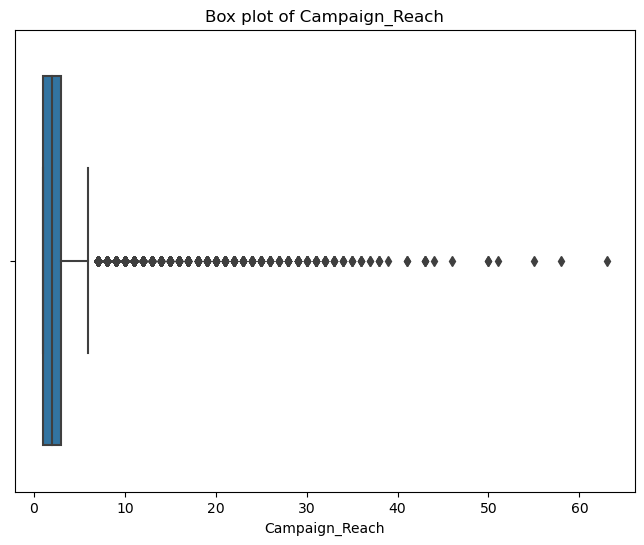

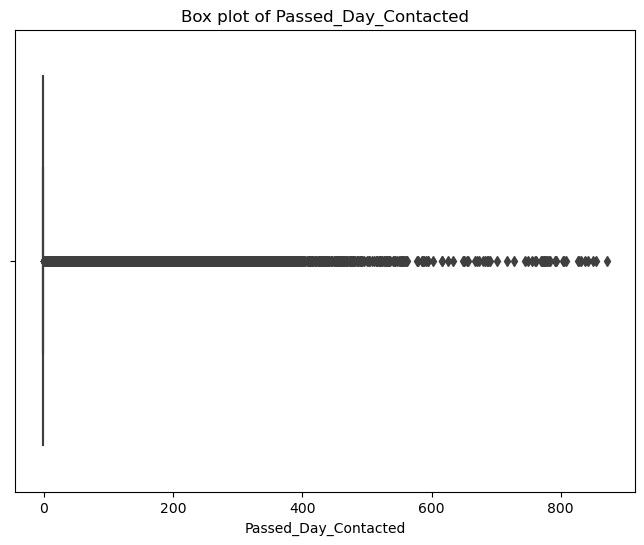

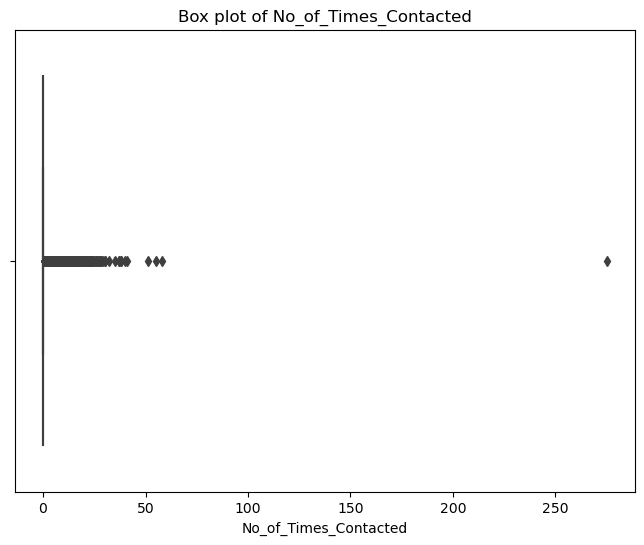

Unique values in Marital_Status:
['married' 'single' 'divorced']
Unique values in Job_Type:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in Education:
['tertiary' 'secondary' 'unknown' 'primary']
Unique values in targeted:
['yes' 'no']
Unique values in Loan_Defaulter:
['no' 'yes']
Unique values in Housing_Loan:
['yes' 'no']
Unique values in Prsonal_Loan:
['no' 'yes']
Unique values in Contact_By:
['unknown' 'cellular' 'telephone']
Unique values in Month_Contacted:
['may, 2017' nan 'jun, 2017' 'jul, 2017' 'aug, 2017' 'oct, 2017'
 'nov, 2017' 'dec, 2017' 'jan, 2017' 'feb, 2017' 'mar, 2017' 'apr, 2017'
 'sep, 2017']
Unique values in Contact_Outcome:
['unknown' 'failure' 'other' 'success']
Unique values in Term_Deposit_Account:
['no' 'yes' nan]


In [7]:
#1. Understanding the Dataset
#a. Load and scrutinize the dataset to comprehend its structure,encompassing columns and data types.
#b. Inspect for any instances of missing values, outliers, or data inconsistencies. 

#a. 

print("First few rows of the dataset:")
print(df.head())

print("\nInformation about the dataset:")
print(df.info())

#b.

# missing values

missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# outliers 

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# data inconsistencies

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())

        Customer_ID  Customer_Age    Cust_Salary  Account_Balance  \
count  45211.000000  45191.000000   45211.000000     45211.000000   
mean   22606.000000     40.935651   57006.171065      1362.272058   
std    13051.435847     10.619198   32085.718415      3044.765829   
min        1.000000     18.000000       0.000000     -8019.000000   
25%    11303.500000     33.000000   20000.000000        72.000000   
50%    22606.000000     39.000000   60000.000000       448.000000   
75%    33908.500000     48.000000   70000.000000      1428.000000   
max    45211.000000     95.000000  120000.000000    102127.000000   

       Day_Contacted  Call_Duration (Sec)  Campaign_Reach  \
count   45211.000000         45211.000000    45211.000000   
mean       15.806419           258.163080        2.763841   
std         8.322476           257.527812        3.098021   
min         1.000000             0.000000        1.000000   
25%         8.000000           103.000000        1.000000   
50%        1

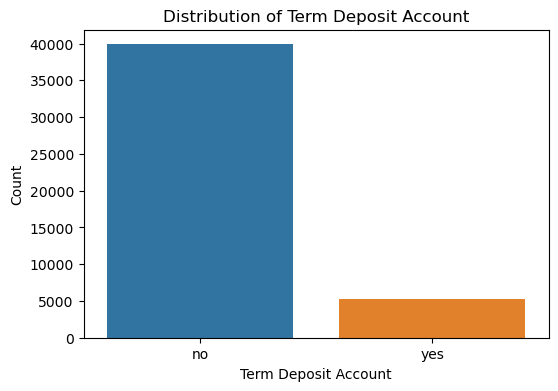

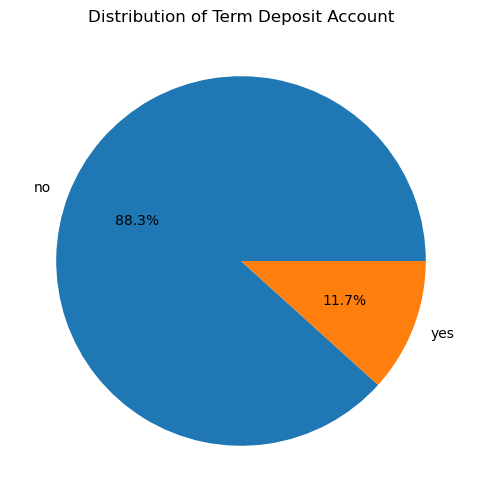

In [54]:
#2. Descriptive Statistics
#a. Derive summary statistics (mean, median, standard deviation) for relevant columns.
#b. Examine the distribution of the target variable, indicating responses to the term deposit campaign.

#a. 
summary_stats = df.describe()

# Display the summary statistics
print(summary_stats)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Term_Deposit_Account')
plt.title('Distribution of Term Deposit Account')
plt.xlabel('Term Deposit Account')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 6))
df['Term_Deposit_Account'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Term Deposit Account')
plt.ylabel('')
plt.show()


Descriptive statistics for Customer_Age
count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: Customer_Age, dtype: float64


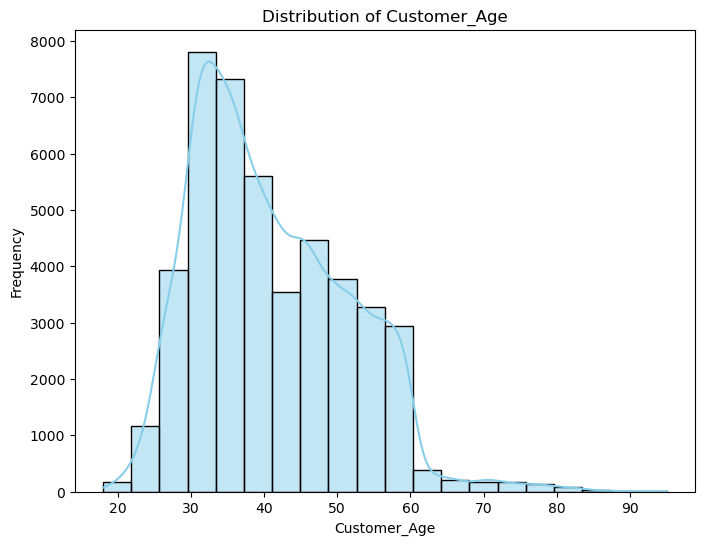

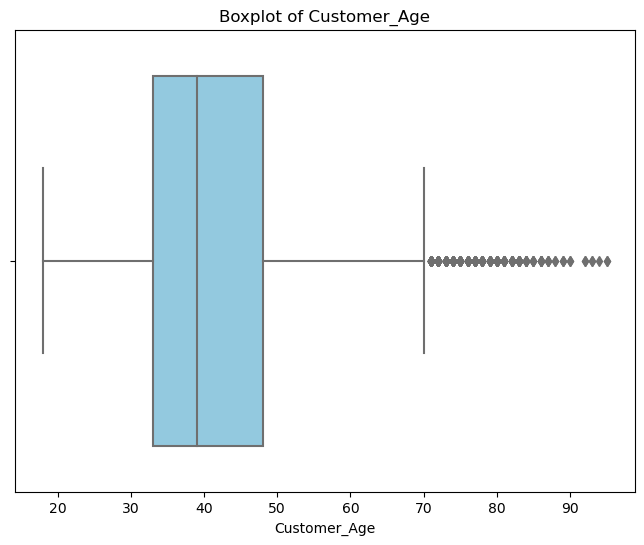

C:\Users\Siddhartha Majumder\AppData\Local\Temp\ipykernel_20692\119229640.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, color='skyblue')


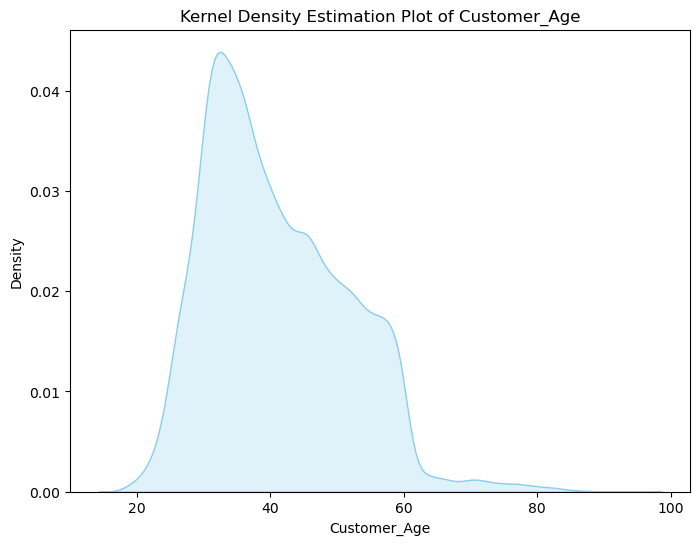

Descriptive statistics for Account_Balance
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: Account_Balance, dtype: float64


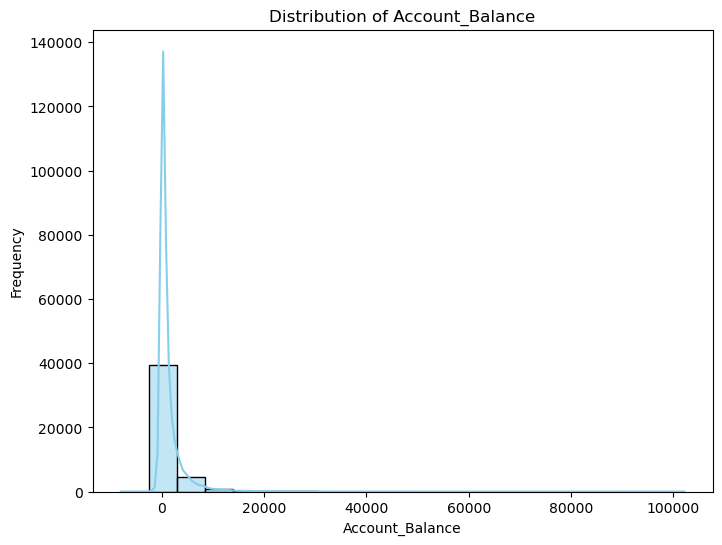

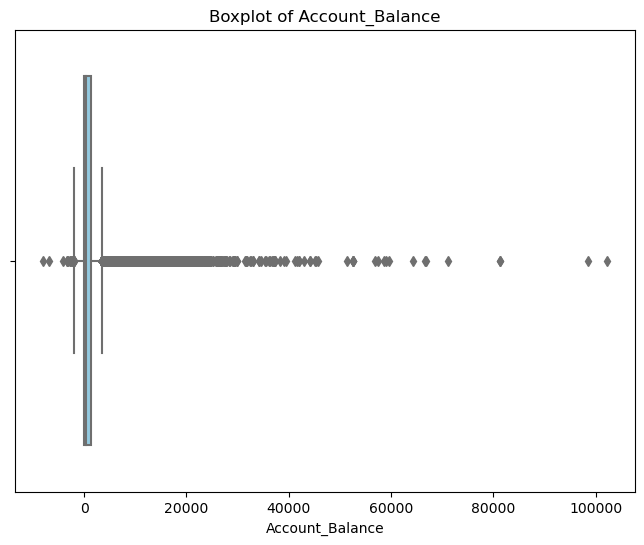

C:\Users\Siddhartha Majumder\AppData\Local\Temp\ipykernel_20692\119229640.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, color='skyblue')


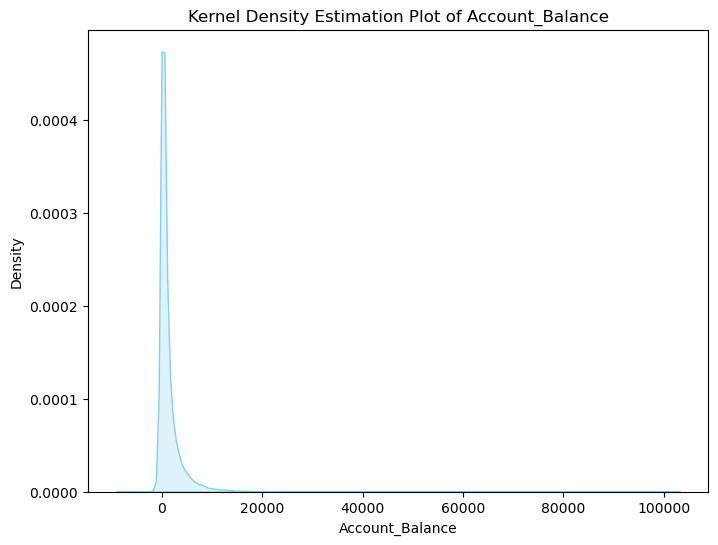

Descriptive statistics for Call_Duration (Sec)
count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: Call_Duration (Sec), dtype: float64


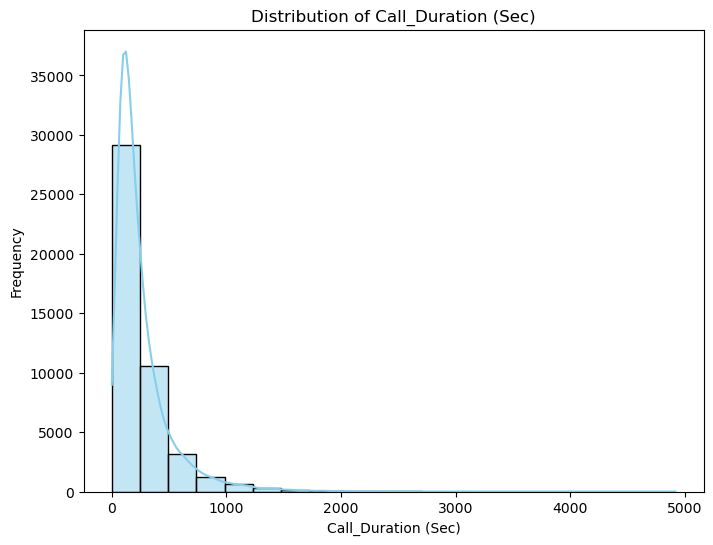

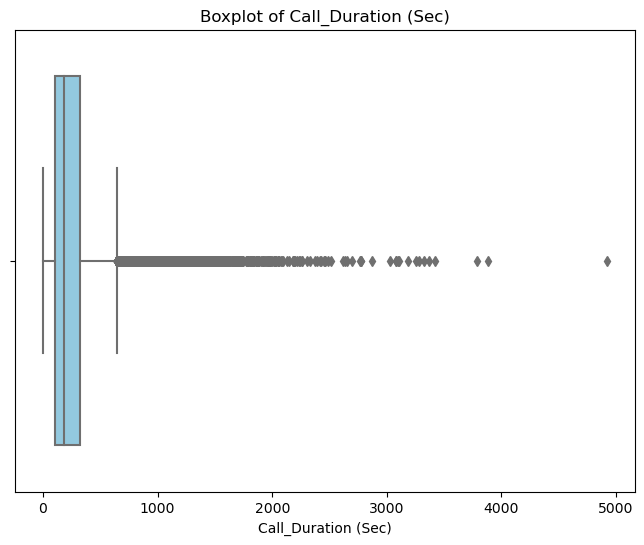

C:\Users\Siddhartha Majumder\AppData\Local\Temp\ipykernel_20692\119229640.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, color='skyblue')


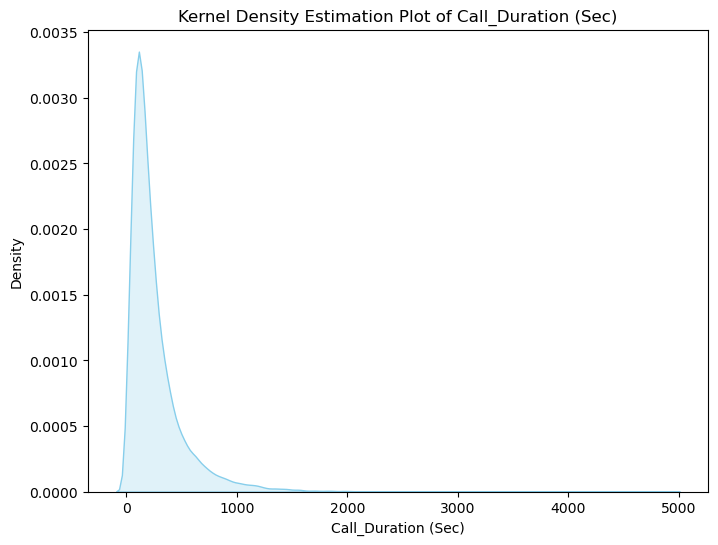

In [15]:
#3. Univariate Analysis
# a. Examine the distribution of individual key features, such as age, balance, and call duration.
# b. Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.

#a & b. 
key_features = ['Customer_Age', 'Account_Balance', 'Call_Duration (Sec)']

for feature in key_features:
    # Descriptive statistics
    print("Descriptive statistics for", feature)
    print(df[feature].describe())
    
    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()
    
    # KDE plot
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[feature], shade=True, color='skyblue')
    plt.title(f'Kernel Density Estimation Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


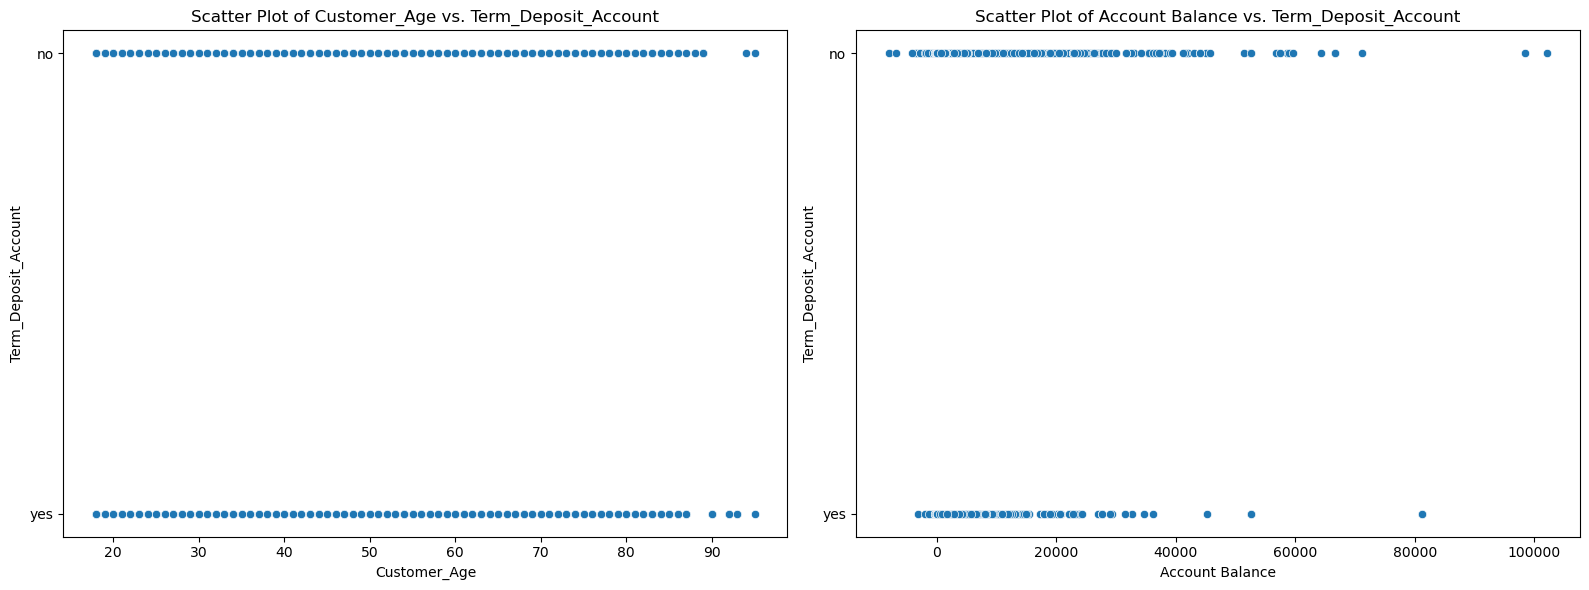

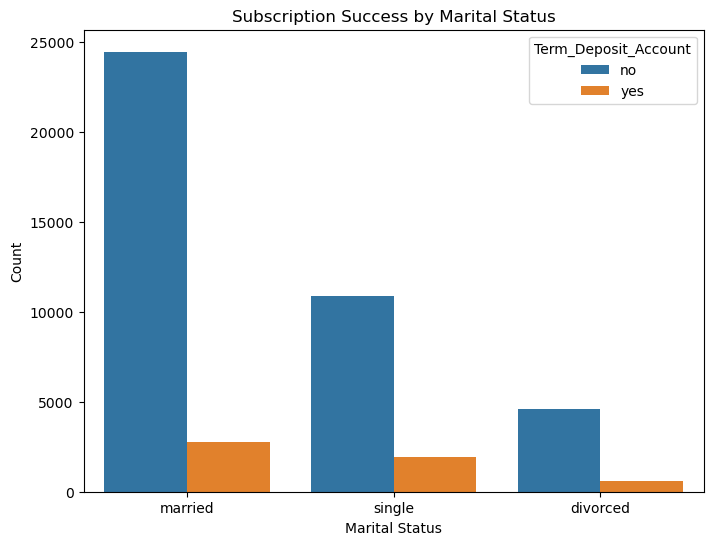

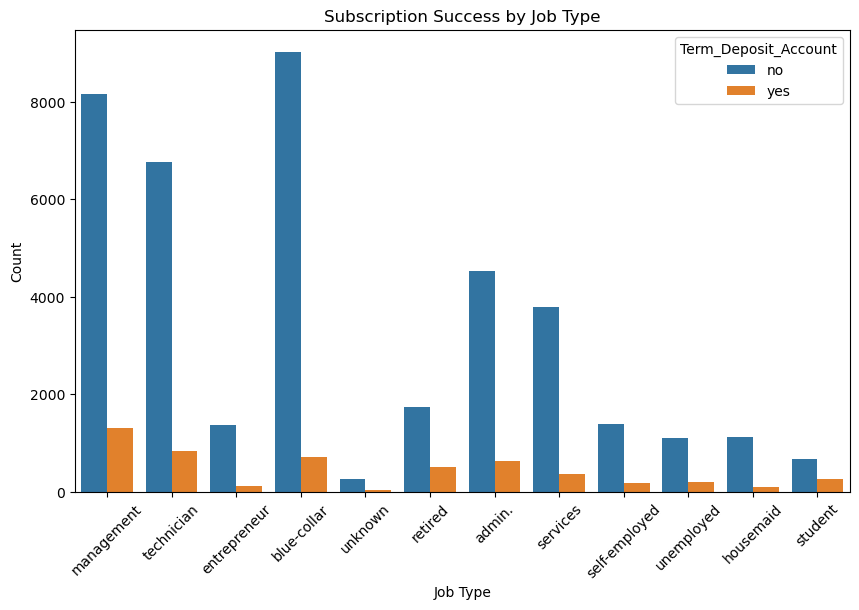

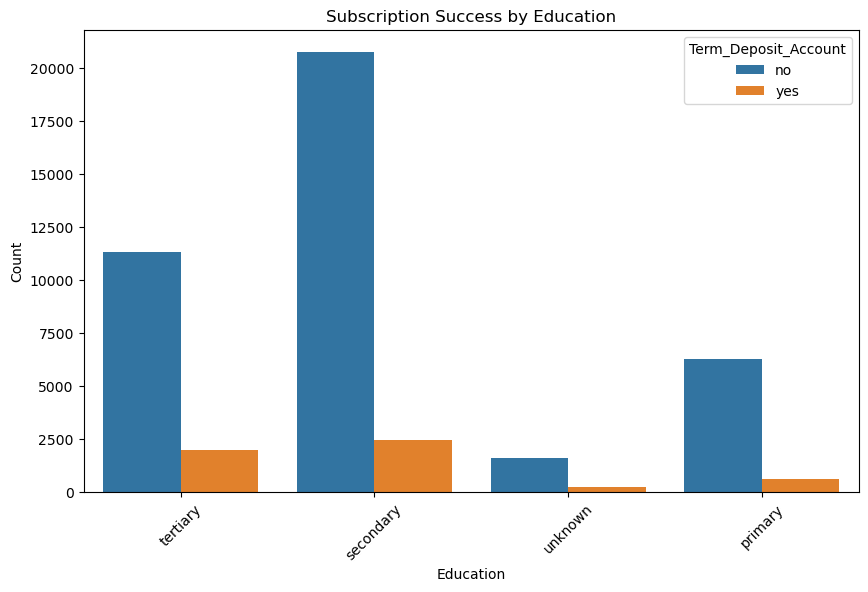

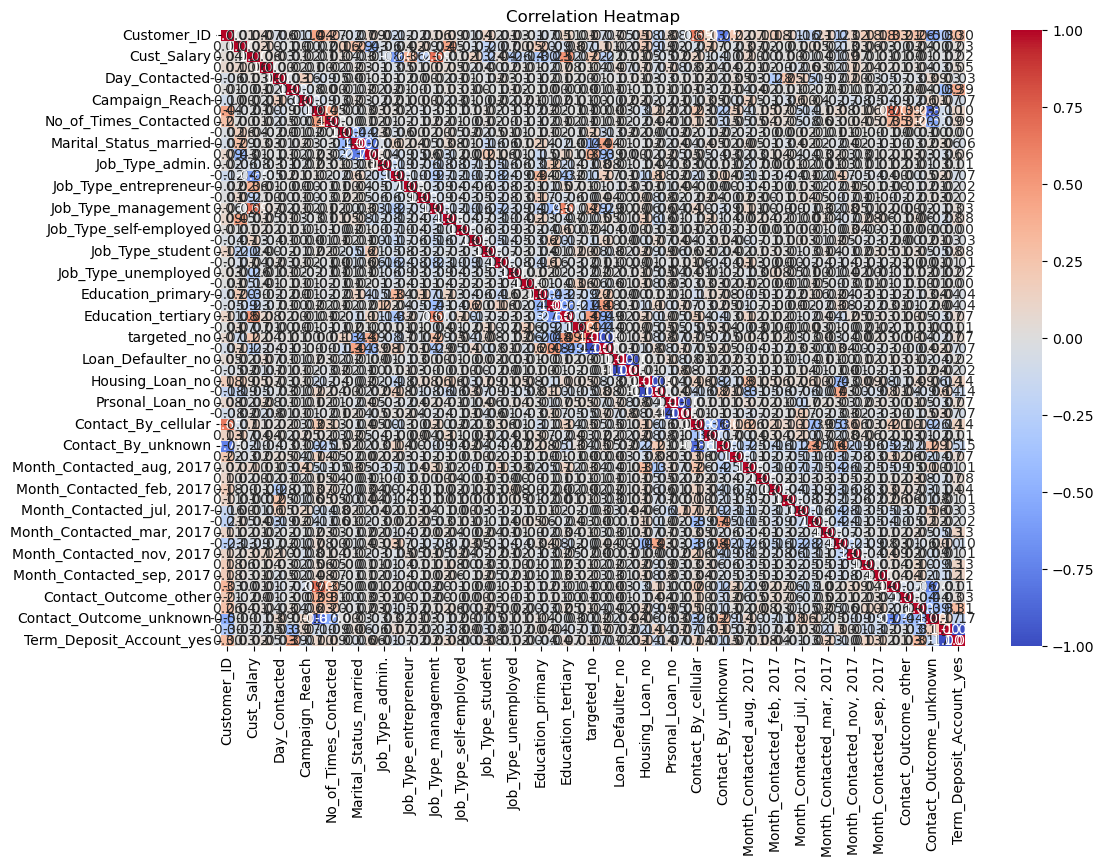

In [55]:
#4. Bivariate Analysis
#a. Evaluate the relationship between independent variables and the target variable.
#b. Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit 
#campaign, using visualizations like bar charts, stacked bar charts, and heatmaps. 
    
# a. Set up the figure and axes for plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting scatter plots of independent variables vs. target variable
sns.scatterplot(x='Customer_Age', y='Term_Deposit_Account', data=df, ax=axs[0])
axs[0].set_title('Scatter Plot of Customer_Age vs. Term_Deposit_Account')
axs[0].set_ylabel('Term_Deposit_Account')
axs[0].set_xlabel('Customer_Age')

sns.scatterplot(x='Account_Balance', y='Term_Deposit_Account', data=df, ax=axs[1])
axs[1].set_title('Scatter Plot of Account Balance vs. Term_Deposit_Account')
axs[1].set_ylabel('Term_Deposit_Account')
axs[1].set_xlabel('Account Balance')

plt.tight_layout()
plt.show()

# b .
    
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital_Status', hue='Term_Deposit_Account')
plt.title('Subscription Success by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Job_Type', hue='Term_Deposit_Account')
plt.title('Subscription Success by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='Term_Deposit_Account')
plt.title('Subscription Success by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
data_encoded = pd.get_dummies(df)

plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

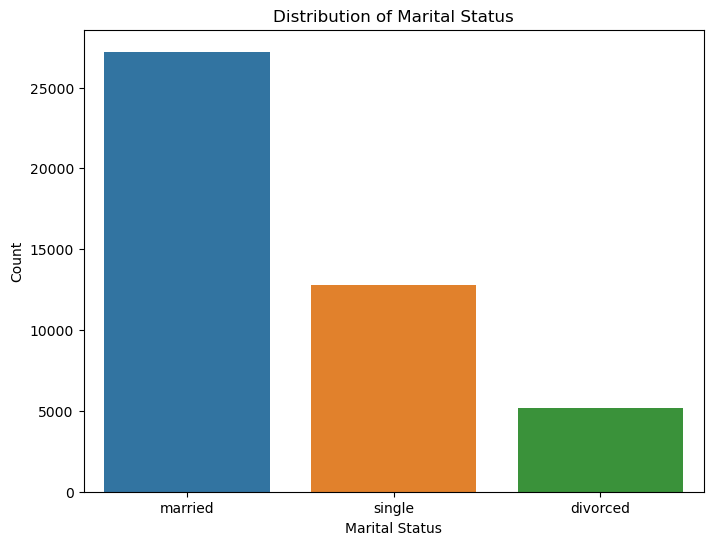

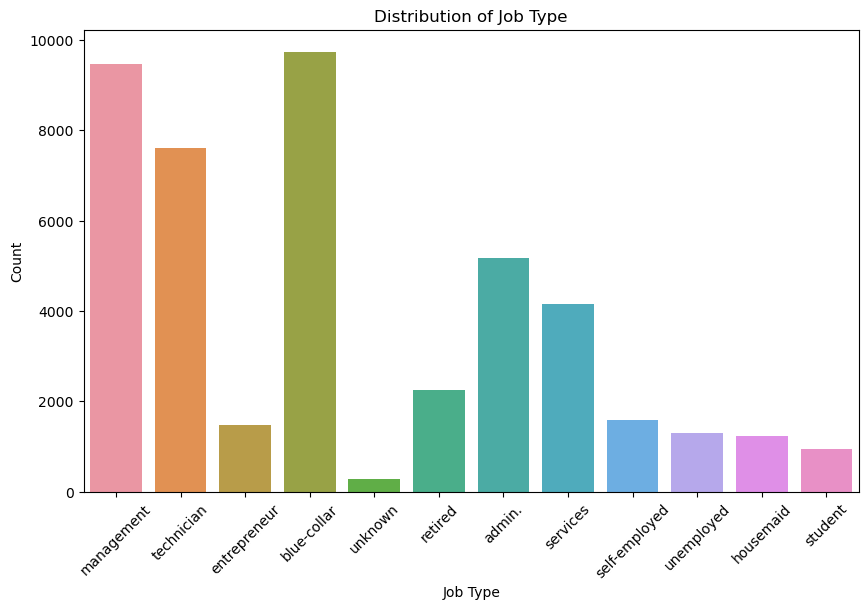

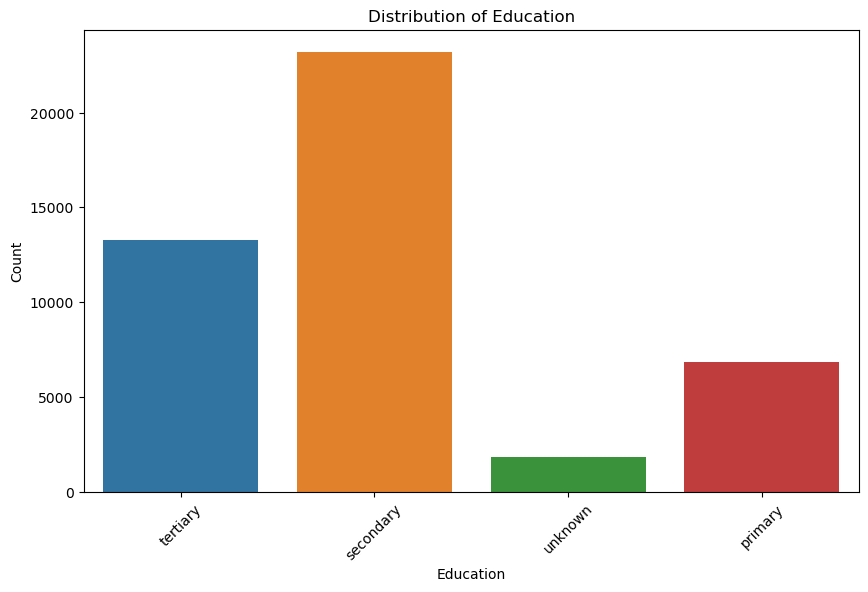

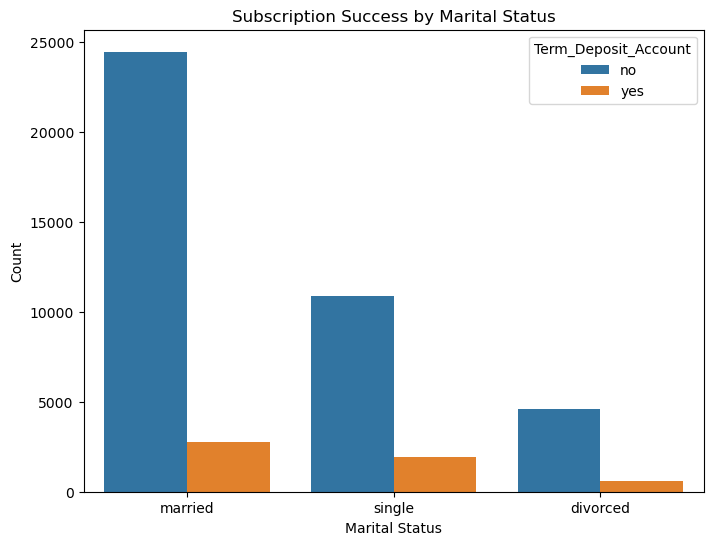

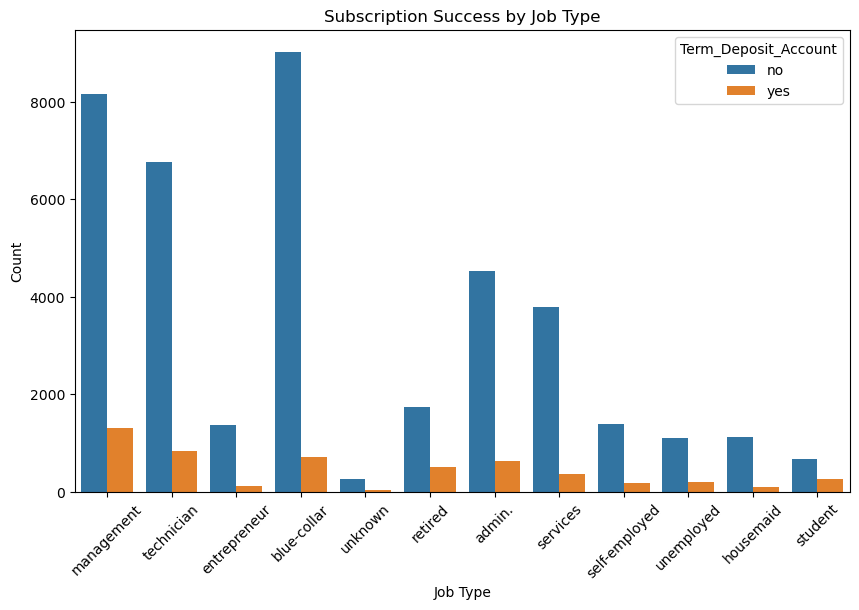

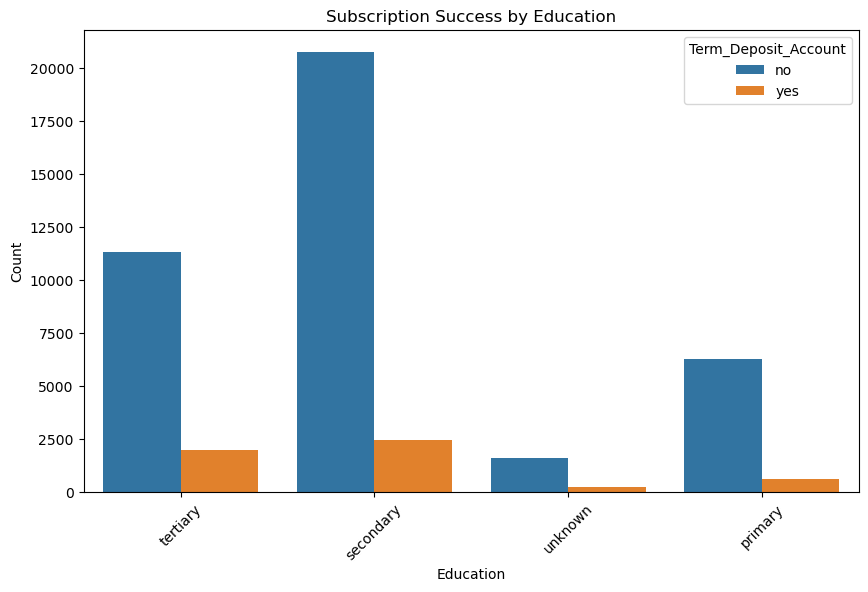

In [56]:
# 5. Categorical Variables Analysis
# a. Investigate the distribution of categorical variables such as job type, education, and marital status.
# b. Assess the impact of these categorical variables on the campaign's success through visualizations like bar chartsE

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital_Status')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Job_Type')
plt.title('Distribution of Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#b.

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital_Status', hue='Term_Deposit_Account')
plt.title('Subscription Success by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Job_Type', hue='Term_Deposit_Account')
plt.title('Subscription Success by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='Term_Deposit_Account')
plt.title('Subscription Success by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [57]:
df.columns

Index(['Customer_ID', 'Customer_Age', 'Cust_Salary', 'Account_Balance',
       'Marital_Status', 'Job_Type', 'Education', 'targeted', 'Loan_Defaulter',
       'Housing_Loan', 'Prsonal_Loan', 'Contact_By', 'Day_Contacted',
       'Month_Contacted', 'Call_Duration (Sec)', 'Campaign_Reach',
       'Passed_Day_Contacted', 'No_of_Times_Contacted', 'Contact_Outcome',
       'Term_Deposit_Account'],
      dtype='object')

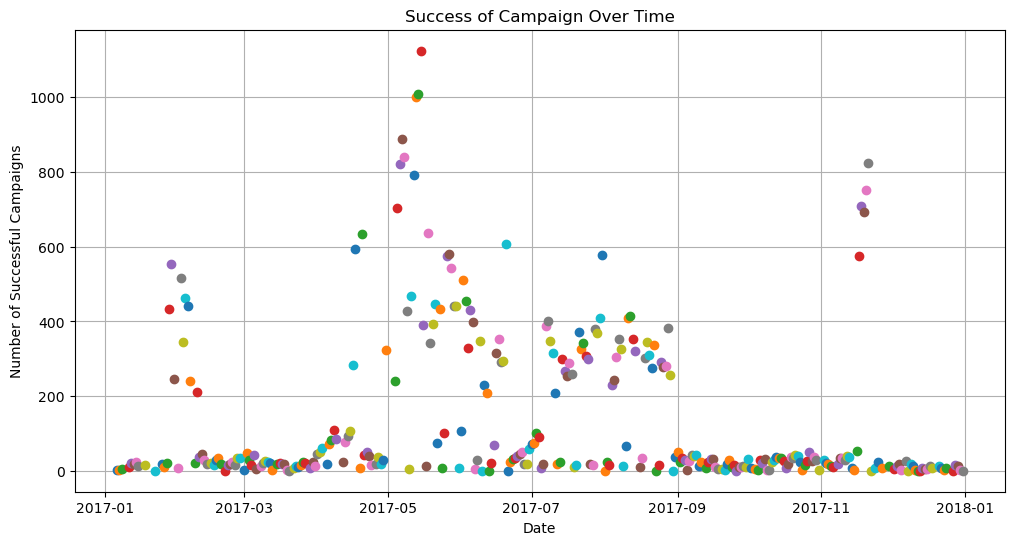

In [56]:
# 6. Temporal Analysis
# a. Investigate temporal patterns in the success of the campaign over time.
# b. Analyze if specific months or days exhibit superior campaign performance.

#A.
    
# Group data by date and response
daily_campaigns = df.groupby(['Date', 'Date']).size().unstack()
 
# Plotting successful campaign counts over time
plt.figure(figsize=(12, 6))
plt.plot(daily_campaigns.index, daily_campaigns, marker='o', linestyle='-')
plt.title('Success of Campaign Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Successful Campaigns')
plt.grid(True)
plt.show()

C:\Users\Siddhartha Majumder\AppData\Local\Temp\ipykernel_16172\3442276793.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


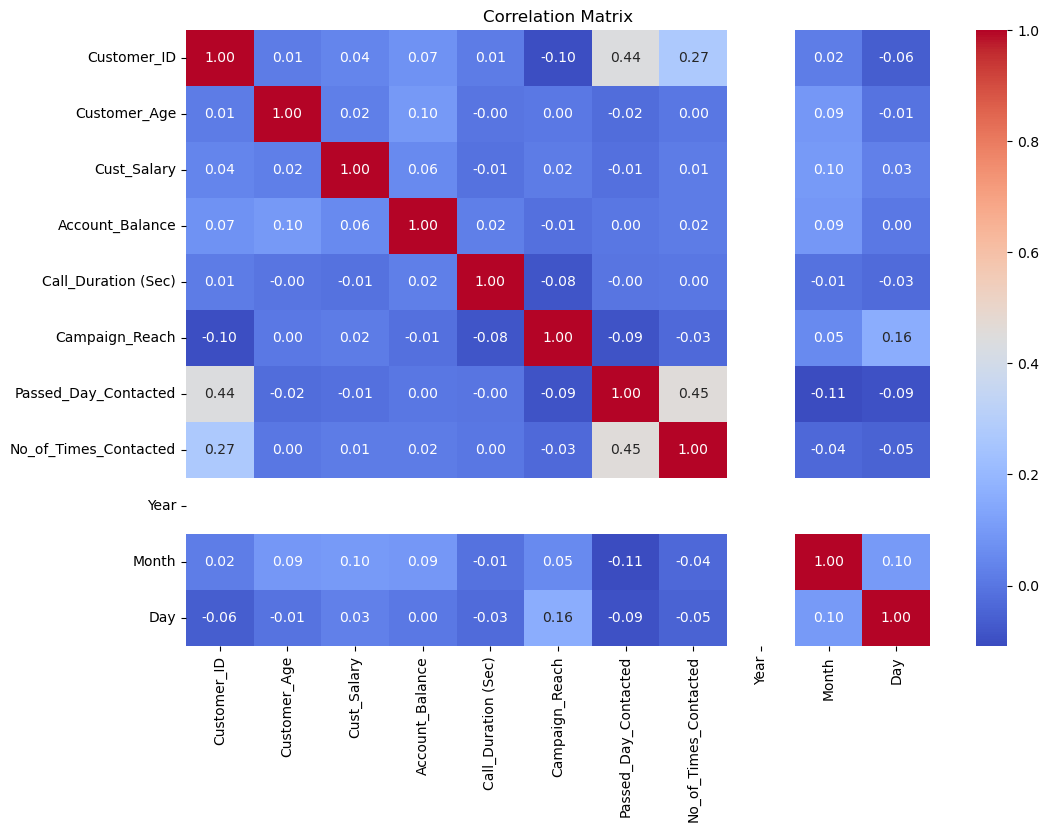

In [80]:
# 8. Correlation Analysis
# a. Examine correlations between independent variables to identify multicollinearity.
# b. Evaluate how correlated features may influence the target variable.

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Number of outliers: 5103


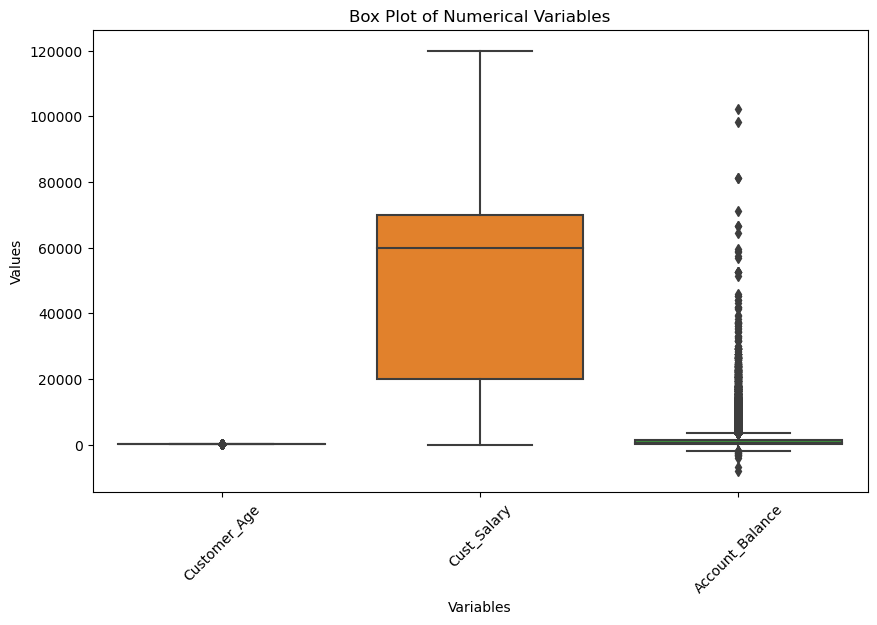

In [92]:
# 9. Outlier Detection and Handling
# a. Identify and rectify outliers that could impact the analysis and predictions

numerical_cols = ['Customer_Age', 'Cust_Salary', 'Account_Balance']

# Calculate the IQR (Interquartile Range)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()
print("Number of outliers:", num_outliers)


plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()